In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (5, 5)})

import statistics

import statsmodels.api as sm



%matplotlib inline

Mengimport dataset

In [93]:
#Mengimport dataset csv 
df = pd.read_csv('nyc-rolling-sales.csv')


Menampilkan data 

In [94]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat tipe data

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [96]:
# Membuang kolom Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [97]:
# Membuang kolom NEIGHBORHOOD
df.drop('NEIGHBORHOOD', axis=1, inplace=True)

 Mengganti tipe data LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE ke integer

In [98]:

nums = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in nums :
    df[col] = pd.to_numeric(df[col], errors='coerce')

Mengganti tipe data kolom BOROUGH ke string

In [99]:

df['BOROUGH'] = df['BOROUGH'].astype(str)


Mengganti kode kota yang ada di kolom Borough dengan nama kotanya 

In [100]:
 
df['BOROUGH'] = df['BOROUGH'].str.replace('1', 'Manhattan')
df['BOROUGH'] = df['BOROUGH'].str.replace('2', 'Bronx')
df['BOROUGH'] = df['BOROUGH'].str.replace('3', 'Brooklyn')
df['BOROUGH'] = df['BOROUGH'].str.replace('4', 'Queens')
df['BOROUGH'] = df['BOROUGH'].str.replace('5', 'Staten Island')

Mengecek missing values

In [101]:
df.isnull().sum()

BOROUGH                               0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Mengisi missing values dengan nilai mean

In [102]:
# mengisi missing values SALE PRICE
df['SALE PRICE'] = df['SALE PRICE'].fillna(df['SALE PRICE'].mean())


In [103]:
# mengisi missing value GROSS SQUARE FEET
df['GROSS SQUARE FEET']= df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [104]:
df['LAND SQUARE FEET']= df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())

In [105]:
# Mengecek kembali missing values
df.isnull().sum()

BOROUGH                           0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Membuat variabel baru dengan kolom BOROUGH dan SALE PRICE

In [106]:
df_dat = df[['BOROUGH', 'SALE PRICE']]
df_dat.head()

,BOROUGH,SALE PRICE
0,Manhattan,6.625000e+06
1,Manhattan,1.276456e+06
2,Manhattan,1.276456e+06
3,Manhattan,3.936272e+06
4,Manhattan,8.000000e+06


menjadikan BOROUGH sebagai index

In [107]:
df_dat.set_index("BOROUGH", inplace=True)

In [108]:
df_dat

,SALE PRICE
BOROUGH,
Manhattan,6.625000e+06
Manhattan,1.276456e+06
Manhattan,1.276456e+06
Manhattan,3.936272e+06
Manhattan,8.000000e+06
...,...
Staten Island,4.500000e+05
Staten Island,5.500000e+05
Staten Island,4.600000e+05


Memilih kota yang akan dianalisis measure of central tendency dan measure of spreadnya

In [109]:
df_dat1 = df_dat[df_dat.index == 'Queens']
df_dat1

,SALE PRICE
BOROUGH,
Queens,7.920000e+05
Queens,1.000000e+01
Queens,2.755000e+05
Queens,9.700000e+05
Queens,1.400000e+06
...,...
Queens,1.276456e+06
Queens,1.276456e+06
Queens,1.276456e+06


### Measure Of Tendency : Mean, Median, Modus

In [110]:
# Menghitung mean SALE PRICE 
mean = df_dat1['SALE PRICE'].mean()
print('Rata-rata SALE PRICE di Queens:', mean)

Rata-rata SALE PRICE di Queens: 906375.7269206801


In [111]:
# Menghitung median SALE PRICE
med = df_dat1['SALE PRICE'].median()
print('Nilai median dari SALE RPICE di Queens:',med)

Nilai median dari SALE RPICE di Queens: 745000.0


In [112]:
# Menghitung modus SALE PRICE
modus = statistics.mode(df_dat1['SALE PRICE'])
print('Modus SALE PRICE di Queens:', modus)

Modus SALE PRICE di Queens: 1276456.4977638705


### Measure of Spread : Range, Variance, Standard Deviation

In [113]:
# Menghitung range minimun dan maximum
rangemin = df_dat1['SALE PRICE'].min()
rangemax = df_dat1['SALE PRICE'].max()
print('Range minimum:', rangemin)
print('Range Maximum:', rangemax)

Range minimum: 1.0
Range Maximum: 257500000.0


In [114]:
# Menghitung variance
var_ = np.var(df_dat1['SALE PRICE'], ddof=1)
print('Variance:',var_)

Variance: 7274833665993.036


In [115]:
# Menghitung standard deviation
std_ = np.std(df_dat1['SALE PRICE'], ddof=1)
print('standar deviasi:', std_)


standar deviasi: 2697189.9573432044


Dari hasil perhitungan measure of tendency dan measure of spread, didapatkan nilai rata- rata harga penjualan property di kota Queens adalah 906375 dolar, kemudian harga tengah dari harga jual property di kota Queens adalah sebesar 745000 kemudian kebanyakan property di kota Queens dijual dengan harga 1276456. Selain itu harga jual property di kota Queens juga sangat bervariasi range harga jual property di kota Queens dari 1.0 hingga 257500000.

### Probability of Distribution

Menghandle outlier dari df_dat1

In [116]:
# Handling Outlier
limit = 1.5*std_
limit_atas = mean + limit
limit_bawah = mean - limit

In [117]:
# Mengecek outlier yang lebih kecil dari limit_bawah
(df_dat1 < limit_bawah).sum()

SALE PRICE    0
dtype: int64

In [118]:
# Mengecek outlier yang lebih besar dari limit_atas 
(df_dat1 > limit_atas).sum()

SALE PRICE    146
dtype: int64

In [119]:
# Mengambil daat tanpa outlier
df_dat12  = df_dat1[(df_dat1 > limit_bawah) & (df_dat1 < limit_atas)]

Membuat grafik probability distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_8072\566474137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dat12['SALE PRICE'])


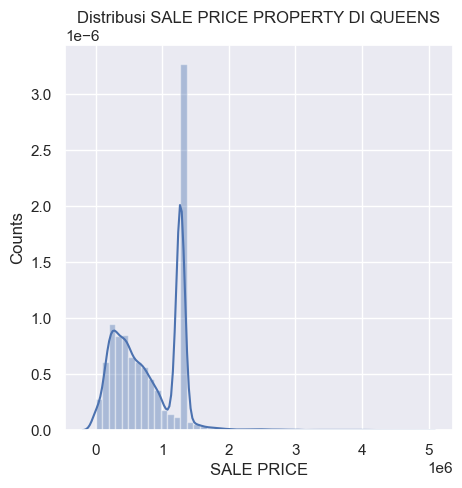

In [120]:
sns.distplot(df_dat12['SALE PRICE'])
plt.title('Distribusi SALE PRICE PROPERTY DI QUEENS')
plt.xlabel('SALE PRICE')
plt.ylabel('Counts')
plt.show()

Berdasarkan grafik diatas dapat disimpulkan bahwa penyebaran SALE PRICE di Queens tidak terdistribusi secara normal. Hal ini karena nilai penyebaran SALE PRICE memiliki 2 puncak yang berbeda

### Confident Intervals

In [121]:
 df.groupby('BOROUGH').agg({'SALE PRICE' : [np.mean, np.std, np.size]})

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.901936e+05  2.783058e+06   7049
Brooklyn       8.344884e+05  3.935813e+06  24047
Manhattan      2.902477e+06  2.141811e+07  18306
Queens         9.063757e+05  2.697190e+06  26736
Staten Island  7.525600e+05  1.641480e+06   8410

In [122]:
mean_Q = 9.063757e+05
std_Q = 2.697190e+06
total_Q = 26736
z_score = 1.96

In [123]:
# Menghitung standar error
se_Q = std_Q / np.sqrt(total_Q)
se_Q

16495.4179755126

In [124]:
# Menghitung limit of the CI
lower_lciq = mean_Q - z_score*se_Q
upper_lciq = mean_Q + z_score*se_Q
print('Lower limit of the CI:', lower_lciq)
print('Upper limit of the CI:', upper_lciq)

Lower limit of the CI: 874044.6807679953
Upper limit of the CI: 938706.7192320046


Setelah menghitung nilai limit of the CI baik limit atas atau upper maupun limit bawah atau lower maka dapat diketahui bahwa rata-rata sesungguhnya dari SALE PRICE di Queens berada disekitar harga  874044 - 938706.

### Hypothesis Testing

Hipotesis = Rata-rata SALE PRICE di Queens lebih besar daripada rata-rata SALE PRICE di Manhattan

Mengambil seluruh data mengenai property yang ada di kota Queens 

In [125]:
Queens = df[df['BOROUGH'] == 'Queens']
Queens.head()


,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
49402,Queens,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,792000.0,2017-07-26 00:00:00
49403,Queens,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,10.0,2017-06-13 00:00:00
49404,Queens,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,275500.0,2016-11-18 00:00:00
49405,Queens,03 THREE FAMILY DWELLINGS,1,949,17,,C0,1914 81 STREET,,11370,3,0,3,2826.0,1840.0,1940,1,C0,970000.0,2017-07-31 00:00:00
49406,Queens,07 RENTALS - WALKUP APARTMENTS,2A,949,67,,C2,1949A 80TH STREET,,11370,6,0,6,2400.0,3960.0,1971,2,C2,1400000.0,2017-05-16 00:00:00


Mengambil seluruh data mengenai property yang ada di kota Manhattan 

In [126]:
Manhattan = df[df['BOROUGH']== 'Manhattan']
Manhattan.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19 00:00:00
1,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14 00:00:00
2,Manhattan,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09 00:00:00
3,Manhattan,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23 00:00:00
4,Manhattan,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17 00:00:00


Menghitung total kota Queens, rata-rata SALE PRICE di Queens dan standar deviation di Queens

In [127]:
total_q = len(Queens)
mean_q = Queens['SALE PRICE'].mean()
sd_q = Queens['SALE PRICE'].std()
(total_q, mean_q, sd_q)

(26736, 906375.7269206801, 2697189.9573432044)

Menghitung total kota Manhattan, rata-rata SALE PRICE di Queens dan standar deviation di Queens

In [128]:
total_m = len(Manhattan)
mean_m = Manhattan['SALE PRICE'].mean()
sd_m = Manhattan['SALE PRICE'].std()
(total_m, mean_m, sd_m)

(18306, 2902476.5473534847, 21418111.93479176)

Menghitnung p_value

In [129]:
sm.stats.ztest(Queens['SALE PRICE'].dropna(), Manhattan['SALE PRICE'].dropna(), alternative = 'two-sided')

(-15.065362293181495, 2.7366134863771636e-51)

p-value = 2.7366134863771636e-51
alpha = 0.05
p-value < alpha = reject the null hypothesis rata-rata SALE PRICE di Queens lebih tinggi daripada rata-rata SALE PRICE di Manhattan itu salah. Artinya hipotesis yang telah disebutkan sebelumnya itu salah. 
